导入依赖/配置路径

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [16]:
# === 1️⃣ 载入数据 ===
train_path = "../data/raw/UNSW-NB15/UNSW_NB15_training-set.csv"
test_path = "../data/raw/UNSW-NB15/UNSW_NB15_testing-set.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(f"训练集: {train_df.shape}, 测试集: {test_df.shape}")

训练集: (82332, 45), 测试集: (175341, 45)


In [17]:
# === 2️⃣ 对类别字段进行编码 ===
cat_cols = ['proto', 'service', 'state', 'attack_cat']

for col in cat_cols:
    le = LabelEncoder()
    combined_values = pd.concat([train_df[col], test_df[col]], axis=0).astype(str)
    le.fit(combined_values)

    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))

    print(f"✅ Encoded '{col}' with {len(le.classes_)} unique values.")

✅ Encoded 'proto' with 133 unique values.
✅ Encoded 'service' with 13 unique values.
✅ Encoded 'state' with 11 unique values.
✅ Encoded 'attack_cat' with 10 unique values.


In [18]:
# === 3️⃣ 分离特征与标签 ===
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']
X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

print(f"特征维度: {X_train.shape[1]}")


特征维度: 44


In [19]:
# === 4️⃣ 训练模型 ===
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# === 5️⃣ 预测与评估 ===
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("\n🎯 模型评估结果：")
print(f"准确率: {acc:.4f}")
print("\n分类报告：")
print(classification_report(y_test, y_pred))


🎯 模型评估结果：
准确率: 0.9508

分类报告：
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     56000
           1       1.00      0.93      0.96    119341

    accuracy                           0.95    175341
   macro avg       0.93      0.96      0.95    175341
weighted avg       0.96      0.95      0.95    175341



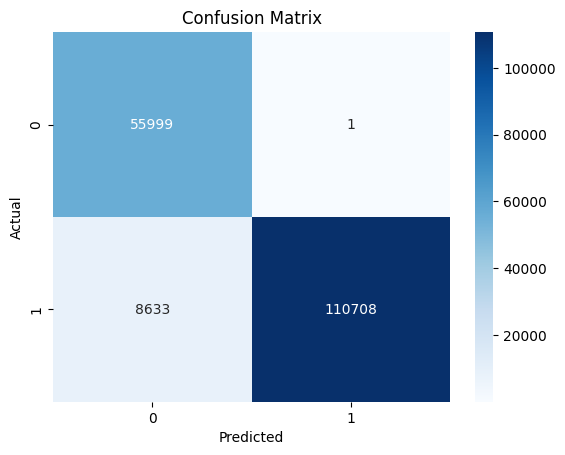

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
